In [1]:
#importing packages
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score,roc_curve, auc

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('cardio_train.csv', sep=";")

In [3]:
print(df)

          id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       smoke  alco  active  cardio  
0 

In [4]:
print(df.keys())

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')


In [5]:
print(df.shape)

(70000, 13)


In [6]:
df.drop(df[(df['height'] > df['height'].quantile(0.975)) 
           | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)

df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) 
           | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)

In [7]:
print(df.shape)

(63866, 13)


In [8]:
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) 
           | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)

df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) 
           | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)

In [9]:
print(df.shape)

(60142, 13)


In [10]:
df['bmi'] = df['weight'] / ((df['height']/100) ** 2)

In [11]:
print(df.head(3))

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   

   alco  active  cardio        bmi  
0     0       1       0  21.967120  
1     0       1       1  34.927679  
2     0       0       1  23.507805  


In [12]:
Y = df['cardio']

In [13]:
X = df.drop(['cardio', 'age'], axis=1)

In [14]:
print(Y)

0        0
1        1
2        1
3        1
4        0
        ..
69993    1
69994    1
69995    0
69998    1
69999    0
Name: cardio, Length: 60142, dtype: int64


In [15]:
print(X)

          id  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0          0       2     168    62.0    110     80            1     1      0   
1          1       1     156    85.0    140     90            3     1      0   
2          2       1     165    64.0    130     70            3     1      0   
3          3       2     169    82.0    150    100            1     1      0   
4          4       1     156    56.0    100     60            1     1      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
69993  99991       1     172    70.0    130     90            1     1      0   
69994  99992       1     165    80.0    150     80            1     1      0   
69995  99993       2     168    76.0    120     80            1     1      1   
69998  99998       1     163    72.0    135     80            1     2      0   
69999  99999       1     170    72.0    120     80            2     1      0   

       alco  active        bmi  
0     

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10)

In [22]:
print(X_test.iloc[0])

id             72726.000000
gender             1.000000
height           172.000000
weight            95.000000
ap_hi            160.000000
ap_lo            100.000000
cholesterol        1.000000
gluc               1.000000
smoke              0.000000
alco               0.000000
active             1.000000
bmi               32.111952
Name: 50979, dtype: float64


In [17]:
print(y_train)

1962     1
30322    0
24008    0
65528    0
29155    1
        ..
8891     0
23506    1
5490     0
49178    0
26934    1
Name: cardio, Length: 54127, dtype: int64


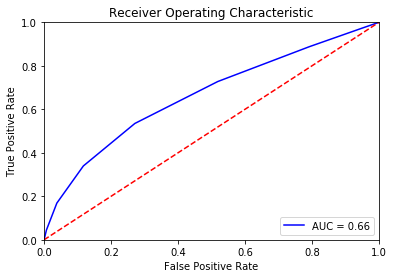

Precision 0.5350907223553577
Accuracy 0.6347464671654198
AUC_ROC 0.6374214056788639
[[2255  839]
 [1358 1563]]
Recall 0.6507077435470441
Precision 0.5350907223553577


In [18]:
# KNN
knn = KNeighborsClassifier(n_neighbors=7,metric='minkowski',weights='uniform',p=1)
knn.fit(X_train, y_train)
y_pred =  knn.predict(X_test)

y_hat_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_hat_proba)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

cm = confusion_matrix(y_test,y_pred)
print('Precision',precision_score(y_pred,y_test))
print('Accuracy', accuracy_score(y_test,y_pred))
print('AUC_ROC',roc_auc_score(y_pred,y_test))
print(cm)
print('Recall', recall_score(y_pred,y_test))
print('Precision',precision_score(y_pred,y_test))

In [19]:
# logistic regression

logistic = LogisticRegression(random_state=12345)
hyperparameters = {'penalty':('l1','l2'),'C':[1,3]}
clf = GridSearchCV(logistic, hyperparameters, cv=3, verbose=0)
best_model = clf.fit(X_train, y_train)

print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

print(X_test)
print(type(X_test))


y_pred = best_model.predict(X_test)
y_hat_proba = best_model.predict_proba(X_test)[:,1]

fpr, tpr, threshold = roc_curve(y_test, y_hat_proba)
roc_auc = auc(fpr, tpr)
# log reg curve
# log_curve = sns.regplot(x=y_hat_proba, y=y_test, data=None, logistic=True)
# plt.title('Probability Curve')

# ROC Curve
# plt.title('Receiver Operating Characteristic')
# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
# plt.legend(loc = 'lower right')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

cm = confusion_matrix(y_test,y_pred)

print('Accuracy', accuracy_score(y_test,y_pred))
print('AUC_ROC',roc_auc_score(y_pred,y_test))
print('Recall', recall_score(y_pred,y_test))
print(cm)
print('Recall', recall_score(y_pred,y_test))
print('Precision',precision_score(y_pred,y_test))

Best Penalty: l1
Best C: 1
          id  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
50979  72726       1     172    95.0    160    100            1     1      0   
34895  49846       1     171    65.0    120     80            1     1      0   
30038  42948       1     162    70.0    120     80            1     2      0   
22450  32075       1     165    96.0    150     90            3     1      0   
8485   12108       1     157    63.0    110     70            1     1      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
31812  45439       2     175    70.0    110     70            2     1      0   
2996    4222       1     172    67.0    120     80            1     1      0   
6586    9389       1     167    89.0    130     95            1     1      0   
8460   12075       2     170    74.0    110     70            1     1      1   
35445  50626       2     173    70.0    120     80            1     1      0   

       alco 

In [20]:
print(df.columns)

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'bmi'],
      dtype='object')


In [21]:
print(list(df.columns))

['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'bmi']
